Untuk melakukan perbandingan hasil deteksi angka menggunakan dataset kelompok dan sekelas, maka notebook ini akan melakukan pengetesan pada dua pengklasifikasi yang berbeda, yang pertama menggunakan dataset kelompok, dan yang kedua menggunakan dataset gabungan satu kelas.

In [46]:
#import dari google drive
#mount google drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [0]:
# Import the modules
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np
import argparse as ap
import keras
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.mobilenet import preprocess_input

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

**Classifier Berdasarkan Dataset Satu Kelompok (700 data: 600 data train, 100 dataset)**

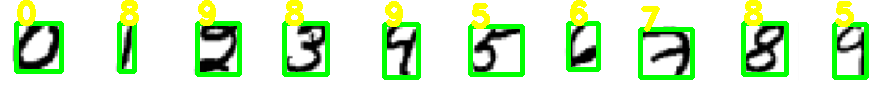

In [90]:
# Load the classifier
new_model = keras.models.load_model('/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/my_model.h5')

# Read the input image 
img_path = "/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/1-10.png"
im = cv2.imread(img_path)

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the region of interest
    a = int(rect[0]) #titik x awal
    b = int(rect[1]) #titik y awal
    c = int(rect[2]) #lebar roi
    d = int(rect[3]) #tinggi roi
    leng = 10 #penambahan daerah agar roi tidak terlalu rapat dengan angka (data set yang dibuat juga masih mengandung background putih di sekeliling angka)
    roi = im_gray[b-leng:b+d+leng, a-leng:a+c+leng]
    # Resize the image
    roi2 = cv2.resize(roi, (28, 28)) #, interpolation=cv2.INTER_AREA)
    x = image.img_to_array(roi2)
    y = np.reshape(x, (1, 28, 28))
    z = np.expand_dims(y, axis=0)
    w = preprocess_input(z)
    nbr = new_model.predict_classes(w) #prediksi kelas
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 3)

#cv2.namedWindow("Resulting Image with Rectangular ROIs", cv2.WINDOW_NORMAL)
from google.colab.patches import cv2_imshow
cv2_imshow(im)

Hasil deteksi dan prediksi digit menggunakan *classifier* dataset kelompok yang memiliki akurasi 0.81 melalui training 10 epoch memberikan hasil deteksi yang benar pada 5/10 digit. Adanya kesalahan prediksi kelas digit dapat diakibatkan oleh roi yang sangat rapat dengan digit, berbeda dengan dataset yang masih memiliki bagian putih cukup banyak sebagai latar belakang digit. Selain itu, bentuk dari tulisan tangan digit tersebut juga memengaruhi hasil prediksi. Bentuk angka 2 dapat terdeteksi 9 karena di bagian atasnya terdapat lengkungan. Angka 3 terdeteksi 8 karena mengandung perut seperti angka 8 serta ada coretan di bagian tengahnya. Angka 4 diprediksi sebagai angka 9 karena roi yang terlalu rapat dengan digit.

**Classifier Berdasarkan Training Dataset Gabungan Satu Kelas**

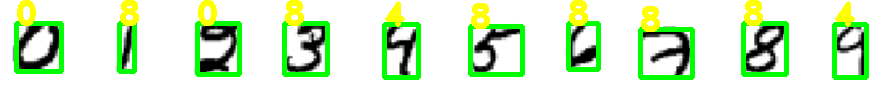

In [91]:
# Load the classifier
model1 = keras.models.load_model('/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/1epoch.h5')

# Read the input image 
img_path = "/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/1-10.png"
im = cv2.imread(img_path)

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the region of interest
    a = int(rect[0]) #titik x awal
    b = int(rect[1]) #titik y awal
    c = int(rect[2]) #lebar roi
    d = int(rect[3]) #tinggi roi
    leng = 10 #penambahan daerah agar roi tidak terlalu rapat dengan angka (data set yang dibuat juga masih mengandung background putih di sekeliling angka)
    roi = im_gray[b-leng:b+d+leng, a-leng:a+c+leng]
    # Resize the image
    roi2 = cv2.resize(roi, (28, 28)) #, interpolation=cv2.INTER_AREA)
    x = image.img_to_array(roi2)
    y = np.reshape(x, (1, 28, 28))
    z = np.expand_dims(y, axis=0)
    w = preprocess_input(z)
    nbr = model1.predict_classes(w) #prediksi kelas
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 3)

#cv2.namedWindow("Resulting Image with Rectangular ROIs", cv2.WINDOW_NORMAL)
from google.colab.patches import cv2_imshow
cv2_imshow(im)

**1 epoch**

Hasil deteksi benar : 3/10 digit.

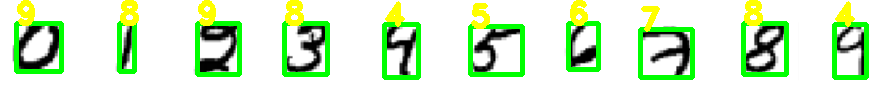

In [92]:
# Load the classifier
model2 = keras.models.load_model('/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/2epoch.h5')

# Read the input image 
img_path = "/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/1-10.png"
im = cv2.imread(img_path)

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the region of interest
    a = int(rect[0]) #titik x awal
    b = int(rect[1]) #titik y awal
    c = int(rect[2]) #lebar roi
    d = int(rect[3]) #tinggi roi
    leng = 10 #penambahan daerah agar roi tidak terlalu rapat dengan angka (data set yang dibuat juga masih mengandung background putih di sekeliling angka)
    roi = im_gray[b-leng:b+d+leng, a-leng:a+c+leng]
    # Resize the image
    roi2 = cv2.resize(roi, (28, 28)) #, interpolation=cv2.INTER_AREA)
    x = image.img_to_array(roi2)
    y = np.reshape(x, (1, 28, 28))
    z = np.expand_dims(y, axis=0)
    w = preprocess_input(z)
    nbr = model2.predict_classes(w) #prediksi kelas
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 3)

#cv2.namedWindow("Resulting Image with Rectangular ROIs", cv2.WINDOW_NORMAL)
from google.colab.patches import cv2_imshow
cv2_imshow(im)

**2 epoch**

Hasil deteksi benar : 5/10 digit.

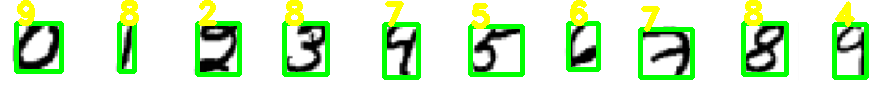

In [93]:
# Load the classifier
model3 = keras.models.load_model('/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/3epoch.h5')

# Read the input image 
img_path = "/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/1-10.png"
im = cv2.imread(img_path)

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the region of interest
    a = int(rect[0]) #titik x awal
    b = int(rect[1]) #titik y awal
    c = int(rect[2]) #lebar roi
    d = int(rect[3]) #tinggi roi
    leng = 10 #penambahan daerah agar roi tidak terlalu rapat dengan angka (data set yang dibuat juga masih mengandung background putih di sekeliling angka)
    roi = im_gray[b-leng:b+d+leng, a-leng:a+c+leng]
    # Resize the image
    roi2 = cv2.resize(roi, (28, 28)) #, interpolation=cv2.INTER_AREA)
    x = image.img_to_array(roi2)
    y = np.reshape(x, (1, 28, 28))
    z = np.expand_dims(y, axis=0)
    w = preprocess_input(z)
    nbr = model3.predict_classes(w) #prediksi kelas
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 3)

#cv2.namedWindow("Resulting Image with Rectangular ROIs", cv2.WINDOW_NORMAL)
from google.colab.patches import cv2_imshow
cv2_imshow(im)

**3 epoch**

Hasil deteksi benar : 5/10 digit.

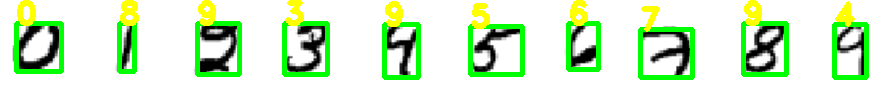

In [96]:
# Load the classifier
model5 = keras.models.load_model('/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/5epoch.h5')

# Read the input image 
img_path = "/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/1-10.png"
im = cv2.imread(img_path)

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the region of interest
    a = int(rect[0]) #titik x awal
    b = int(rect[1]) #titik y awal
    c = int(rect[2]) #lebar roi
    d = int(rect[3]) #tinggi roi
    leng = 10 #penambahan daerah agar roi tidak terlalu rapat dengan angka (data set yang dibuat juga masih mengandung background putih di sekeliling angka)
    roi = im_gray[b-leng:b+d+leng, a-leng:a+c+leng]
    # Resize the image
    roi2 = cv2.resize(roi, (28, 28)) #, interpolation=cv2.INTER_AREA)
    x = image.img_to_array(roi2)
    y = np.reshape(x, (1, 28, 28))
    z = np.expand_dims(y, axis=0)
    w = preprocess_input(z)
    nbr = model5.predict_classes(w) #prediksi kelas
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 3)

#cv2.namedWindow("Resulting Image with Rectangular ROIs", cv2.WINDOW_NORMAL)
from google.colab.patches import cv2_imshow
cv2_imshow(im)

**5 epoch**

Hasil deteksi benar : 5/10 digit.

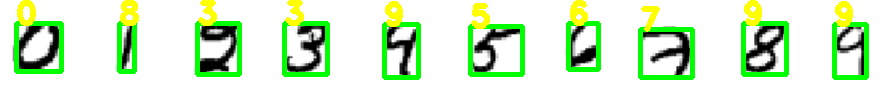

In [0]:
# Load the classifier
model7 = keras.models.load_model('/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/7epoch.h5')

# Read the input image 
img_path = "/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/1-10.png"
im = cv2.imread(img_path)

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the region of interest
    a = int(rect[0]) #titik x awal
    b = int(rect[1]) #titik y awal
    c = int(rect[2]) #lebar roi
    d = int(rect[3]) #tinggi roi
    leng = 10 #penambahan daerah agar roi tidak terlalu rapat dengan angka (data set yang dibuat juga masih mengandung background putih di sekeliling angka)
    roi = im_gray[b-leng:b+d+leng, a-leng:a+c+leng]
    # Resize the image
    roi2 = cv2.resize(roi, (28, 28)) #, interpolation=cv2.INTER_AREA)
    x = image.img_to_array(roi2)
    y = np.reshape(x, (1, 28, 28))
    z = np.expand_dims(y, axis=0)
    w = preprocess_input(z)
    nbr = model7.predict_classes(w) #prediksi kelas
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 3)

#cv2.namedWindow("Resulting Image with Rectangular ROIs", cv2.WINDOW_NORMAL)
from google.colab.patches import cv2_imshow
cv2_imshow(im)

**7 epoch**

Hasil deteksi benar : 6/10 digit.

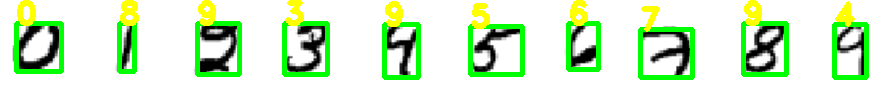

In [95]:
# Load the classifier
model10 = keras.models.load_model('/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/10epoch.h5')

# Read the input image 
img_path = "/content/drive/My Drive/Tugas Kuliah/18316002 Fathiya Rahma/Tugas 5/1-10.png"
im = cv2.imread(img_path)

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the region of interest
    a = int(rect[0]) #titik x awal
    b = int(rect[1]) #titik y awal
    c = int(rect[2]) #lebar roi
    d = int(rect[3]) #tinggi roi
    leng = 10 #penambahan daerah agar roi tidak terlalu rapat dengan angka (data set yang dibuat juga masih mengandung background putih di sekeliling angka)
    roi = im_gray[b-leng:b+d+leng, a-leng:a+c+leng]
    # Resize the image
    roi2 = cv2.resize(roi, (28, 28)) #, interpolation=cv2.INTER_AREA)
    x = image.img_to_array(roi2)
    y = np.reshape(x, (1, 28, 28))
    z = np.expand_dims(y, axis=0)
    w = preprocess_input(z)
    nbr = model10.predict_classes(w) #prediksi kelas
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 3)

#cv2.namedWindow("Resulting Image with Rectangular ROIs", cv2.WINDOW_NORMAL)
from google.colab.patches import cv2_imshow
cv2_imshow(im)

**10 epoch**

Hasil deteksi benar : 5/10 digit.

Berdasarkan pengetesan menggunakan *classifier* yang di-training dengan data gabungan satu kelas, hasil paling optimal untuk gambar yang diinput diperoleh ketika digunakan model7 yang merupakan hasil training dengan 7 epoch. Hasil deteksi benarnya adalah 6/10.

Jika dibandingkan dengan dataset satu kelompok, perbedaan hasil prediksi digit tidak jauh berbeda untuk kasus deteksi digit pada gambar yang diinput (1-10.jpg). Hal ini dapat disebabkan oleh variasi tulisan yang kurang banyak, atau mayoritas tulisan pada dataset hampir sama dan tidak ada yang menyerupai dengan apa yang ada di gambar input, meskipun jumlah dataset nya jauh lebih banyak dibandingkan dengan jumlah data set satu kelompok.